# Netflix Data Analysis

## Introduction
This project analyzes Netflix Movies and TV Shows data to understand patterns in content distribution, genres, release years, and more.

The goal is to practice data cleaning, visualization, and derive meaningful insights about Netflix’s content strategy.

Dataset Source: Kaggle - Netflix Movies and TV Shows

In [21]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

## Load Dataset
Let's load the Netflix dataset and take a look at the first few rows.

In [22]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# Display the first few rows
df.head()



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Dataset Information
Check the basic structure of the dataset — data types, missing values, etc.

In [23]:
# Dataset info
df.info()

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Observations:
- 'director', 'cast', 'country', 'date_added', and 'rating' have missing values.
- We'll handle these missing entries during data cleaning.

In [24]:
# Fill 'country', 'rating', 'director' missing with 'Unknown'
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)

# Convert 'date_added' safely
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Drop rows where 'date_added' is missing
df.dropna(subset=['date_added'], inplace=True)

# Create 'year_added' and 'month_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Drop rows where 'duration' is missing
df.dropna(subset=['duration'], inplace=True)

# Optional: Fill missing 'cast' with 'Unknown'
df['cast'].fillna('Unknown', inplace=True)

# Check final missing values
df.isnull().sum()




show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

## Exploratory Data Analysis (EDA)
Let's explore different aspects of the Netflix content data.

### Type of Content: Movies vs TV Shows

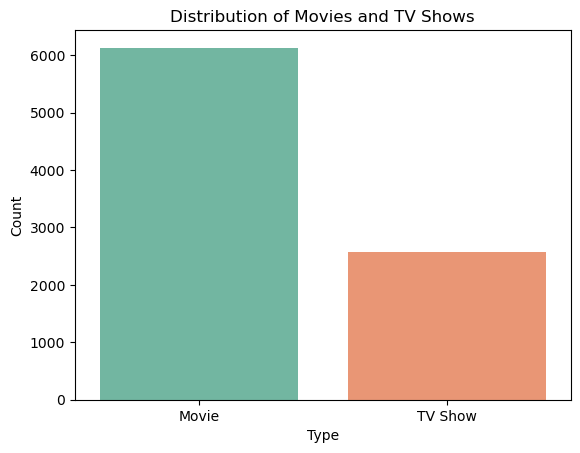

In [25]:
# Plot content type
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


### Top 10 Countries with Most Content


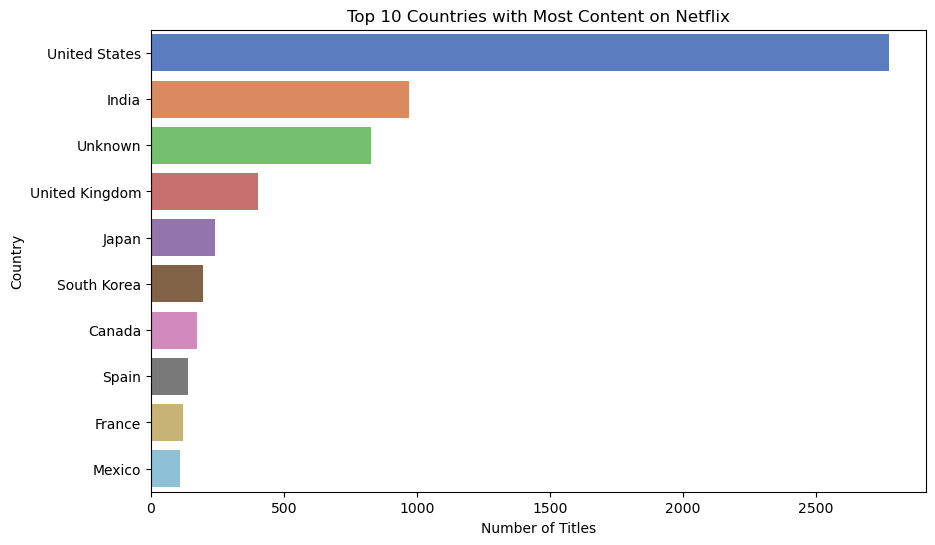

In [26]:
# Top 10 countries
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='muted')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


### Content Added to Netflix Over the Years


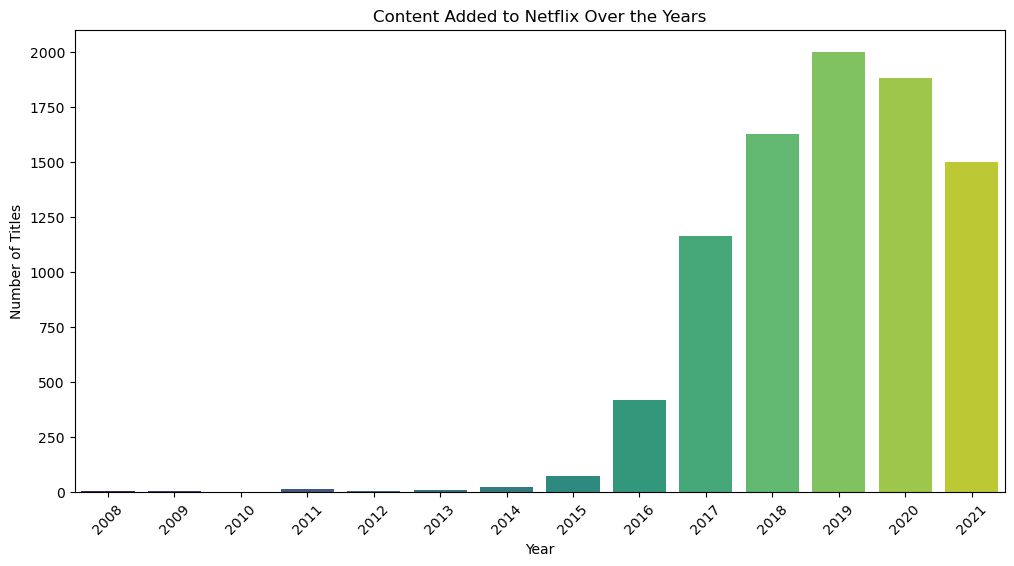

In [27]:
# Titles added by year
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added', palette='viridis', order=sorted(df['year_added'].dropna().unique()))
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


### Release Years of Netflix Content


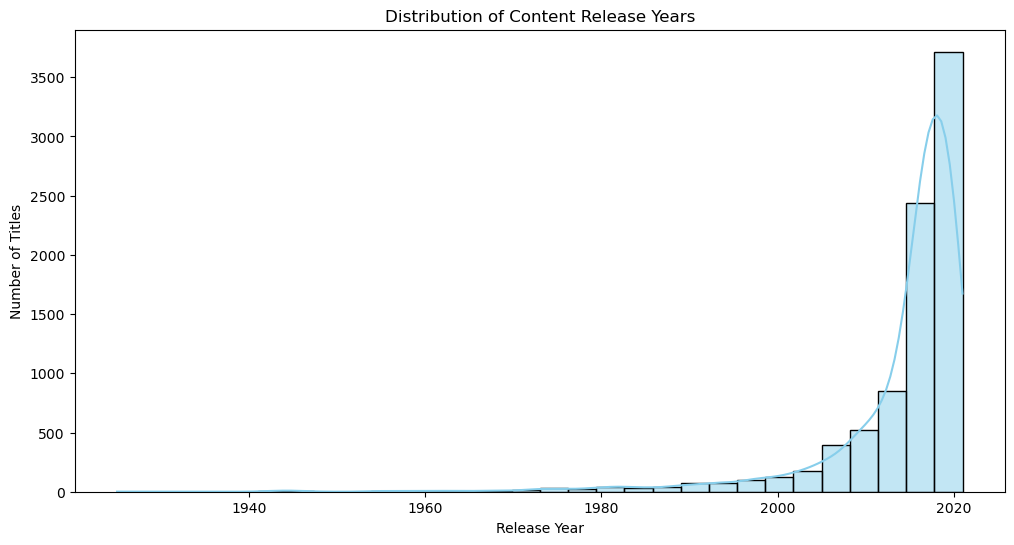

In [28]:
# Histogram of release years
plt.figure(figsize=(12,6))
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Content Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()


### Top Genres on Netflix


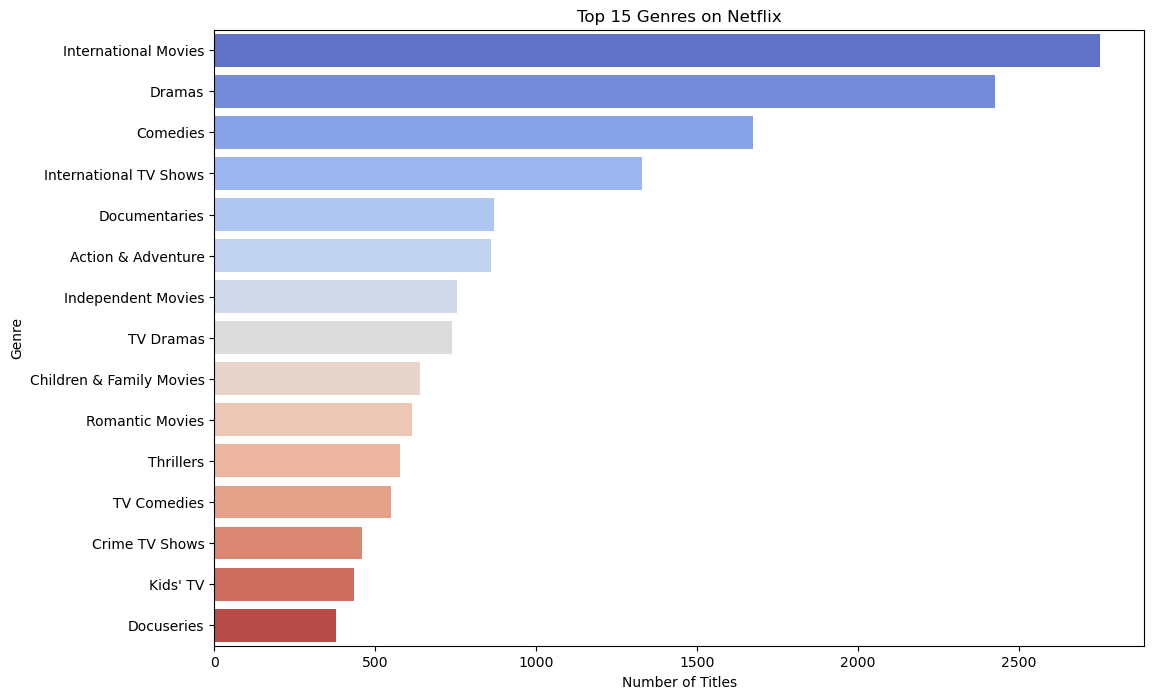

In [29]:
# Most common genres
genres = df['listed_in'].str.split(', ').explode()

top_genres = genres.value_counts().head(15)

plt.figure(figsize=(12,8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


### WordCloud of Titles


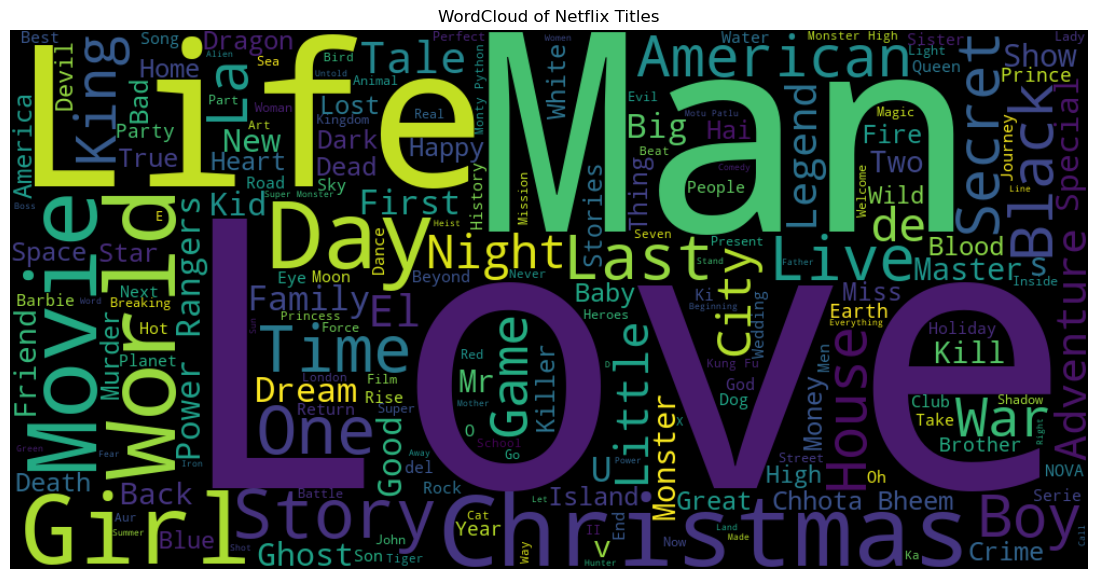

In [30]:
# Wordcloud of Titles
titles = ' '.join(df['title'].dropna())

wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(titles)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Netflix Titles')
plt.show()


### Top 10 Directors with Most Titles


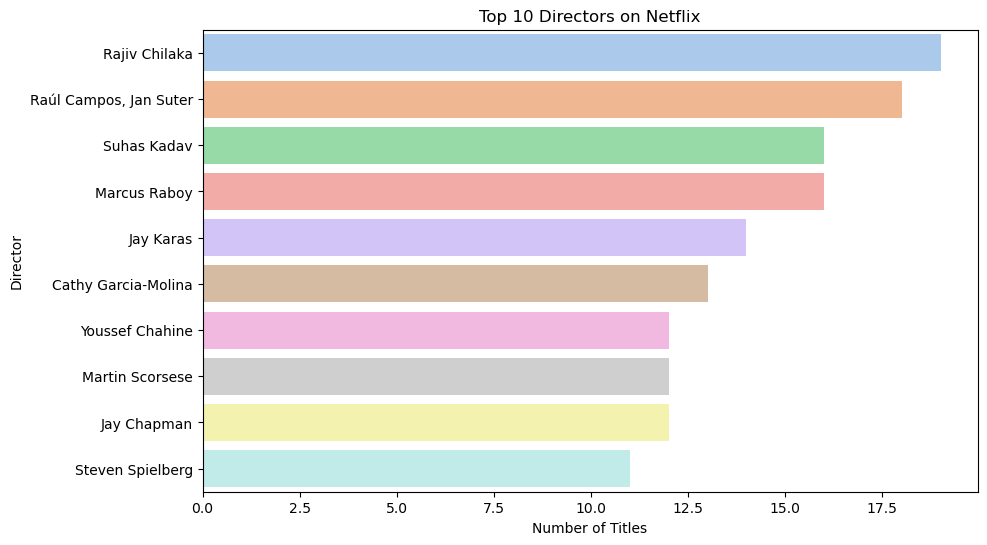

In [31]:
# Top 10 directors
top_directors = df['director'].value_counts().drop('Unknown').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='pastel')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


## Conclusion

- Movies are more common than TV shows on Netflix.
- The United States produces the most Netflix content.
- Most content was added after 2016.
- Drama, Comedy, and Documentary are the top genres.
- Netflix focuses heavily on content released after 2000.